In [25]:
import onnxruntime as ort
import numpy as np
import torch

# Check run model

In [2]:
model_path = '/home/max/ieos/small_obj/vid_pred/rt-detr.onnx'
session = ort.InferenceSession(model_path)

In [10]:
in_img = session.get_inputs()[0].name
in_shape = session.get_inputs()[1].name

In [29]:
input_data = np.random.randn(1,3,224,224).astype(np.float32)

In [28]:
outputs = session.run(None, {in_img:input_data, in_shape:np.array([[224,224]])})

In [14]:
len(outputs)

3

In [15]:
outputs[0]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 

In [17]:
outputs[1].shape

(1, 300, 4)

In [20]:
print(outputs[2].shape)
print(outputs[2])

(1, 300)
[[0.27316475 0.26300678 0.23084089 0.19033262 0.16942456 0.16688973
  0.14677536 0.13693476 0.12945291 0.12425894 0.12363556 0.11298227
  0.11177203 0.10385311 0.08960617 0.08561978 0.07927868 0.07700938
  0.07469958 0.0730716  0.06864634 0.06546029 0.06466058 0.05665705
  0.05497998 0.0531382  0.04583946 0.0454593  0.04339427 0.04293191
  0.0422554  0.04051822 0.04002389 0.03798187 0.0376837  0.03747419
  0.03707972 0.03572178 0.03371888 0.03046432 0.02882153 0.02872291
  0.02850503 0.02806783 0.02801025 0.02714962 0.02664974 0.02636555
  0.02586976 0.02554107 0.02539968 0.02481738 0.02370003 0.02315292
  0.02141502 0.02124217 0.01978385 0.01966122 0.0192188  0.01899746
  0.01892105 0.01873392 0.01866898 0.01772398 0.01635951 0.01606122
  0.0158352  0.01519978 0.01507884 0.01486868 0.01481694 0.01479822
  0.01464561 0.01450384 0.01445991 0.01395896 0.0136176  0.01279685
  0.01272056 0.01267478 0.01246989 0.01225922 0.01184314 0.01175755
  0.01161459 0.01159686 0.01148787 0.01

# Check on real image

In [21]:
import cv2
import os
import json
import numpy as np
import matplotlib.pylab as plt

In [23]:
def load_json(path:str) -> list | dict:
    with open(path, 'rb') as read_file:
        ann = json.load(read_file)
    return ann

In [24]:
img_folder_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/images"
ann_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/annotations.json"
ann = load_json(ann_path)

In [40]:
bbox_ann = ann['annotations'][23]
img_ann = ann['images'][bbox_ann['image_id'] - 1]
img_path = os.path.join(img_folder_path, img_ann['file_name'])
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb,(224,224))
img = img_resized.transpose((2, 0, 1))
img = np.expand_dims(img, 0)
img = img.astype(np.float32)
img /= 255

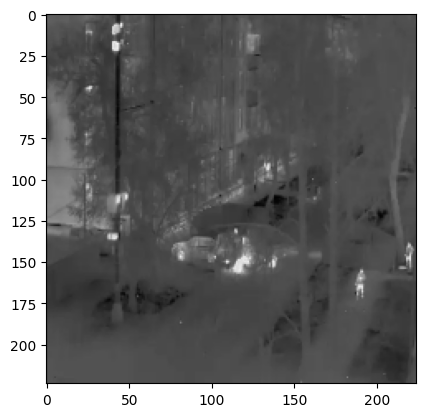

In [38]:
img_resized.shape
plt.imshow(img_resized)

In [41]:
img.shape

(1, 3, 224, 224)

In [42]:
outputs = session.run(None, {in_img:img, in_shape:np.array([[224,224]])})

In [44]:
outputs[0]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 

In [45]:
outputs[1]

array([[[185.50525  , 151.93416  , 193.88795  , 177.0108   ],
        [216.3119   , 136.81087  , 222.51729  , 156.87033  ],
        [215.96301  , 136.92603  , 222.0188   , 156.69043  ],
        ...,
        [ 45.094963 , 218.07283  ,  54.312557 , 223.59637  ],
        [170.75905  ,   1.9664702, 178.05594  ,  49.151257 ],
        [ 28.842787 , 217.90096  ,  37.825497 , 223.54787  ]]],
      dtype=float32)

In [49]:
outputs[1].shape

(1, 300, 4)

In [46]:
outputs[2]

array([[8.57738733e-01, 6.72536850e-01, 5.81767380e-01, 2.74871171e-01,
        2.57090330e-01, 9.32668447e-02, 5.26330769e-02, 4.55943346e-02,
        4.31470573e-02, 4.04181182e-02, 3.19490731e-02, 2.22069621e-02,
        1.59199834e-02, 1.57964826e-02, 1.34950280e-02, 1.31704509e-02,
        1.12514496e-02, 1.06688142e-02, 1.05365813e-02, 1.01251006e-02,
        1.00569725e-02, 9.70593095e-03, 9.66149569e-03, 9.23076272e-03,
        9.03406739e-03, 8.96820426e-03, 8.47369432e-03, 8.32951069e-03,
        8.21730494e-03, 8.11925530e-03, 7.79458880e-03, 7.71766901e-03,
        7.18250871e-03, 6.64874911e-03, 6.21819496e-03, 5.99566102e-03,
        5.98707795e-03, 5.47558069e-03, 5.07998466e-03, 5.06967306e-03,
        5.06615639e-03, 5.02902269e-03, 4.98396158e-03, 4.76992130e-03,
        4.74447012e-03, 4.55343723e-03, 4.46525216e-03, 4.46283817e-03,
        4.26715612e-03, 4.25255299e-03, 4.19417024e-03, 4.10053134e-03,
        4.09746170e-03, 4.09334898e-03, 4.06932831e-03, 4.026442

In [53]:
outputs[2].shape

(1, 300)

num bboxes: 21
box size (pix): w:8 h:25
box size (pix): w:6 h:20
box size (pix): w:6 h:20
box size (pix): w:6 h:21
box size (pix): w:5 h:20
box size (pix): w:5 h:12
box size (pix): w:5 h:18
box size (pix): w:5 h:17
box size (pix): w:3 h:9
box size (pix): w:8 h:21
box size (pix): w:9 h:22
box size (pix): w:9 h:25
box size (pix): w:3 h:7
box size (pix): w:5 h:9
box size (pix): w:3 h:12
box size (pix): w:3 h:5
box size (pix): w:4 h:13
box size (pix): w:2 h:4
box size (pix): w:3 h:4
box size (pix): w:7 h:16
box size (pix): w:4 h:8


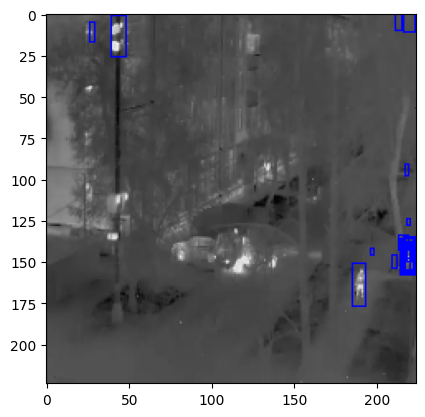

In [68]:
img_draw = img_resized.copy()
scores = outputs[2][0]
bboxes = outputs[1][0][scores > 0.01]
print(f'num bboxes: {len(bboxes)}')
for bbox in bboxes:
    print(f'box size (pix): w:{round(bbox[2] - bbox[0])} h:{round(bbox[3]-bbox[1])}')
    img_draw = cv2.rectangle(img_draw, (int(bbox[2]), int(bbox[3])), (int(bbox[0]), int(bbox[1])),  (0,0,255), 1)
plt.imshow(img_draw);

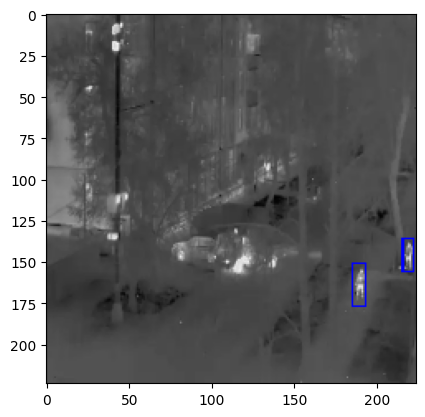